In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import torch         
import torch.nn as nn    
import torch.nn.functional as F   
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
from PIL import Image 
import imageio 
from early_stopping import EarlyStopping
import os, gc
import random 
from matplotlib.ticker import MultipleLocator
from matplotlib.backends.backend_pdf import PdfPages

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


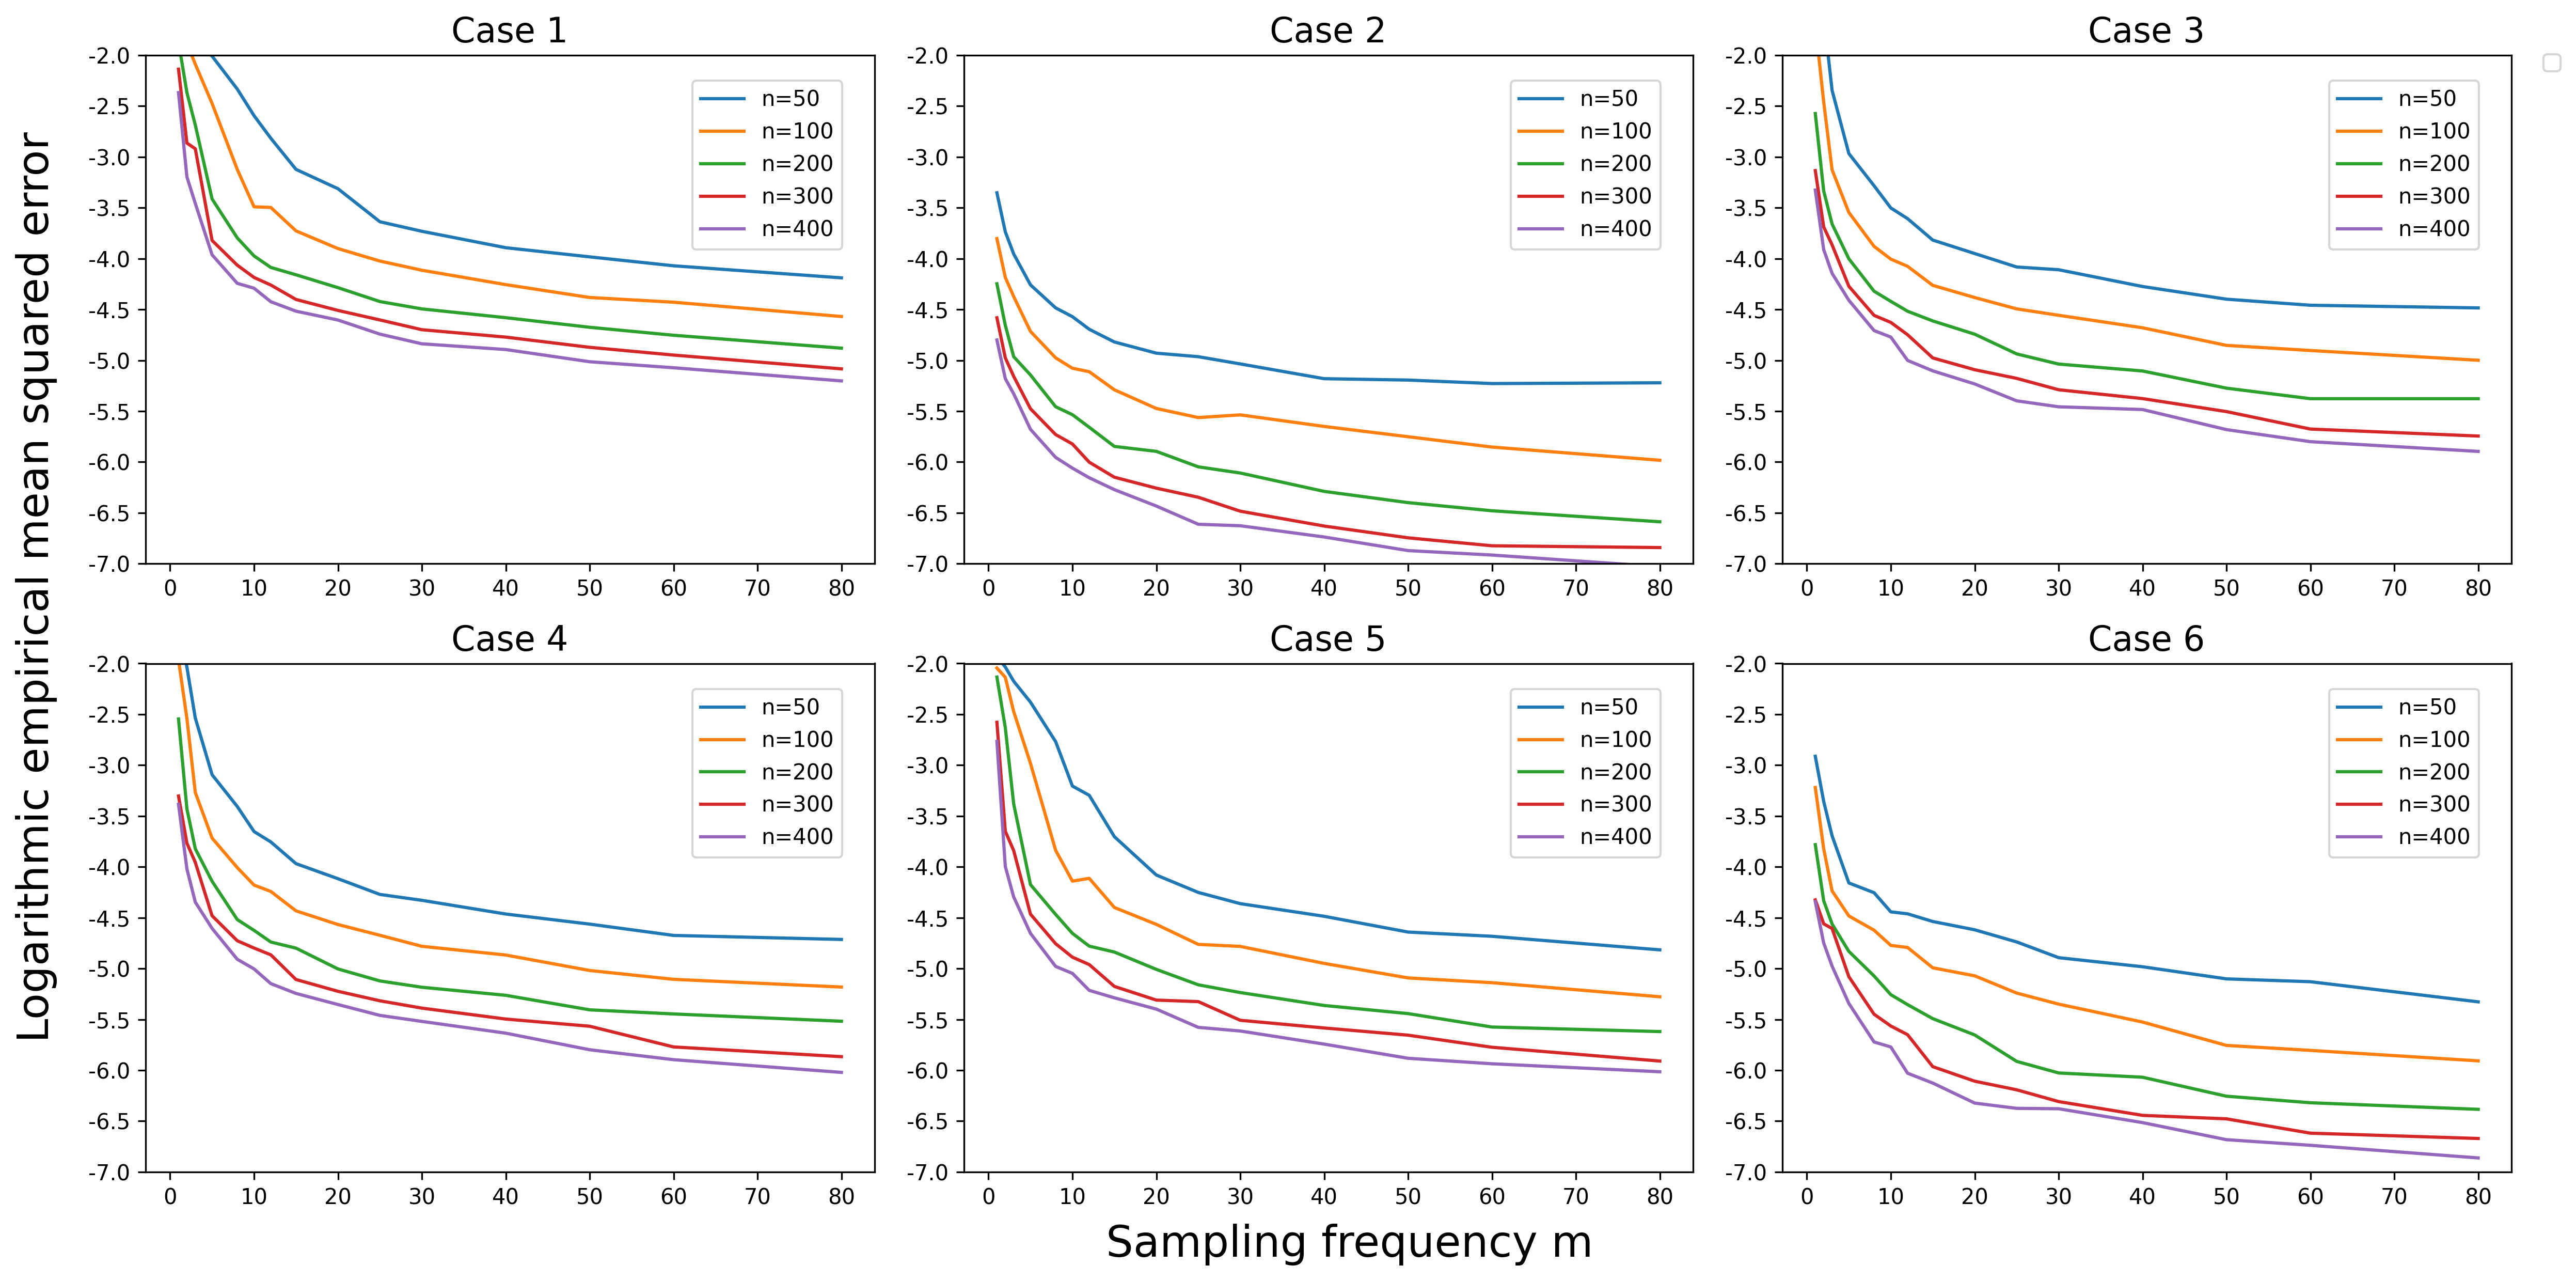

In [19]:
n_vector = [50,100,200,300,400] 
m_vector = [1,2,3,5,8,10,12,15,20,25,30,40,50,60,80] 

def subplotv(ax,n_vector,m_vector,path,title1,ylim = None,yticks=None):
    nnressum = np.zeros((len(n_vector), len(m_vector)))
    for i in range(len(n_vector)): 
        for j in range(len(m_vector)): 
            n_train = n_vector[i]
            m_train = m_vector[j]

            resnmdd = np.load(path+str(n_train)+"m"+str(m_train)+".npy",allow_pickle=True) 

            col_indexes = np.arange(0, resnmdd.shape[1], 3) 
            idx = np.argmin(resnmdd[:,col_indexes],axis=1)
            resnmdd[np.arange(resnmdd.shape[0]),np.argmin(resnmdd[:,col_indexes],axis=1)]
            kk1 = np.array([(resnmdd[i, 3*idx[i]], resnmdd[i, 3*idx[i]+1], resnmdd[i, 3*idx[i]+2]) for i in range(resnmdd.shape[0])])  
            kk1 = kk1.mean(axis=0) 
            nnressum[i][j] = kk1[1] 
    # 生成数据
    x = np.sort(m_vector)
    for i in range(len(n_vector)):
        ax.plot(x, np.log(nnressum[i,:]), label='n='+str(n_vector[i])) # nnressum[i,:]

    if ((ylim is None) is False):
        ax.set_ylim(ylim)
        if ((yticks is None) is False):
            ax.set_yticks(yticks,yticks)
    # ax.set_yticks(list(range(-7,-1,1)),list(range(-7,-1,1)))

#    ax.set_xlim((min(m_vector), max(m_vector)))    
    y_major_locator=MultipleLocator(0.5)#以每3显示
    ax.legend(loc=2, bbox_to_anchor=(0.75,0.95), borderaxespad = 0.)
    ax.yaxis.set_major_locator(y_major_locator)
    ax.set_title(title1,size = 16)

fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, dpi=300,figsize=(16,8))
fig.text(s='Logarithmic empirical mean squared error',rotation=90,x = -0.02, y = 0.16,fontsize = 20,) 
fig.text(s='Sampling frequency m',x = 0.42, y = -0.02, fontsize = 20) 
fig.legend(loc=2, bbox_to_anchor=(1,0.95), borderaxespad = 0.)
path = "./Case1/res/res" 
subplotv(ax1,n_vector,m_vector,path,title1='Case 1',ylim = (-7,-2), yticks=np.linspace(-7,-2,11))
path = "./Case2/res/res" 
subplotv(ax2,n_vector,m_vector,path,title1='Case 2',ylim = (-7,-2), yticks=np.linspace(-7,-2,11))
path = "./Case3/res/res" 
subplotv(ax3,n_vector,m_vector,path,title1='Case 3',ylim = (-7,-2), yticks=np.linspace(-7,-2,11))
path = "./Case4/res/res" 
subplotv(ax4,n_vector,m_vector,path,title1='Case 4',ylim = (-7,-2), yticks=np.linspace(-7,-2,11))
path = "./Case5/res/res" 
subplotv(ax5,n_vector,m_vector,path,title1='Case 5',ylim = (-7,-2), yticks=np.linspace(-7,-2,11))
path = "./Case6/res/res" 
subplotv(ax6,n_vector,m_vector,path,title1='Case 6',ylim = (-7,-2), yticks=np.linspace(-7,-2,11))
plt.tight_layout()